In [35]:
import json
import pandas as pd

# Đọc dữ liệu từ file JSON
with open('all_labeled.json', 'r', encoding='utf-8') as f:
    data_list = json.load(f)

# Danh sách để lưu các từ điển đã xử lý
processed_list = []

# Xử lý từng mục trong dữ liệu
for entry in data_list:
    # Sao chép từ điển "data" để tránh sửa đổi dữ liệu gốc
    data_dict = entry['data'].copy()
    
    # Lấy annotation đầu tiên (giả định chỉ có một annotation)
    annotation = entry['annotations'][0]
    
    # Duyệt qua từng kết quả trong "result"
    for result in annotation['result']:
        from_name = result['from_name']  # Lấy tên trường (ví dụ: Image_helpfulness)
        choice = result['value']['choices'][0]  # Lấy giá trị choice đầu tiên
        data_dict[from_name] = choice  # Thêm vào từ điển
    
    # Thêm từ điển đã xử lý vào danh sách
    processed_list.append(data_dict)

# Tạo DataFrame từ danh sách các từ điển
df = pd.DataFrame(processed_list)
df.head()


,user_name,rating,comment,images,created_at,thank_count,product_id,product_name,has_image,has_comment,product_category,Image_helpfulness,Comment_helpfulness,All_helpfulness
0,Mint Mint,5,giao hàng nhanh và hsd xa,[https://salt.tikicdn.com/ts/review/8f/d2/cf/0...,1640476800000,0,2454325,Thùng 48 Hộp Sữa Uống Dutch Lady Cô Gái Hà Lan...,1,1,food&drink,2,3,2
1,Nguyễn Bích Hạnh,5,Truyện rất hay mình bàng hoàng nhận ra tác giả...,[],1625097600000,6,76013370,Được Học (Tái Bản),0,1,book,1,4,2
2,Lan Anh,5,Sản phẩm chất lượng tốt tiện lợi giá cả hợp lý...,[],1661126400000,0,185248203,Máy Xay Đồ Ăn Dặm Cho Bé 6 Lưỡi Cối Thuỷ Tinh ...,0,1,stationery,1,3,2
3,Tâm Châu,1,Giao hàng nhanh nhưng máy kêu rất to như máy cày,[],1649894400000,0,27577966,Máy Xay Sinh Tố Lock&Lock EJM462 (350W - 1.2 L...,0,1,stationery,1,4,2
4,Bé Tuấn,2,giao hàng nhanh nhưng mà sách lại bị ố vàng ng...,[https://salt.tikicdn.com/ts/review/6f/f6/8d/4...,1653177600000,0,16284286,Tuổi Thơ Dữ Dội - Tập 1 (Tái Bản),1,1,book,5,4,3


### Chọn biến để phân tích


In [36]:
# Chỉ giữ lại các trường mong muốn
cols = ['product_name', 'Image_helpfulness', 'Comment_helpfulness', 'All_helpfulness', 'comment', 'images']
df = df[cols]

# Hiển thị 5 dòng đầu tiên của DataFrame (tùy chọn)

# Thêm trường độ dài comment theo số từ
df['comment_word_count'] = df['comment'].apply(lambda x: len(str(x).split()))

df.shape
df.head()

,product_name,Image_helpfulness,Comment_helpfulness,All_helpfulness,comment,images,comment_word_count
0,Thùng 48 Hộp Sữa Uống Dutch Lady Cô Gái Hà Lan...,2,3,2,giao hàng nhanh và hsd xa,[https://salt.tikicdn.com/ts/review/8f/d2/cf/0...,6
1,Được Học (Tái Bản),1,4,2,Truyện rất hay mình bàng hoàng nhận ra tác giả...,[],59
2,Máy Xay Đồ Ăn Dặm Cho Bé 6 Lưỡi Cối Thuỷ Tinh ...,1,3,2,Sản phẩm chất lượng tốt tiện lợi giá cả hợp lý...,[],13
3,Máy Xay Sinh Tố Lock&Lock EJM462 (350W - 1.2 L...,1,4,2,Giao hàng nhanh nhưng máy kêu rất to như máy cày,[],11
4,Tuổi Thơ Dữ Dội - Tập 1 (Tái Bản),5,4,3,giao hàng nhanh nhưng mà sách lại bị ố vàng ng...,[https://salt.tikicdn.com/ts/review/6f/f6/8d/4...,30


Hệ số tương quan giữa comment_word_count và Comment_helpfulness: 0.463


C:\Users\Sacchi\AppData\Local\Temp\ipykernel_6960\2581636320.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


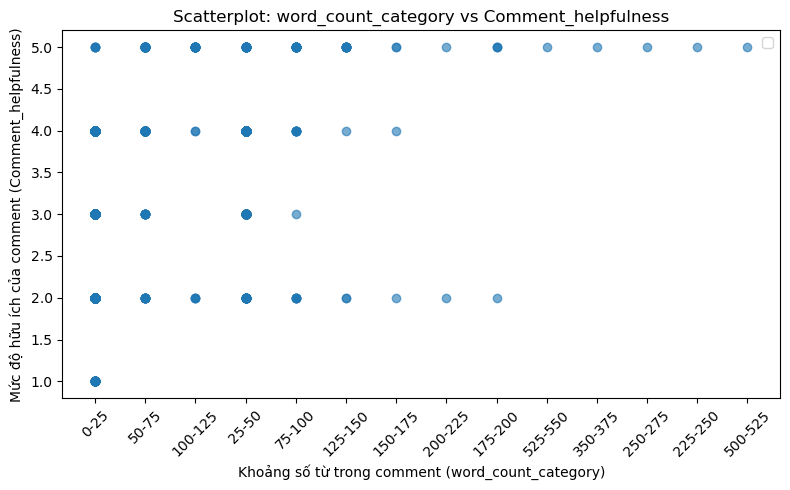

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Xác định các khoảng (bins) cách nhau 25 từ
max_words = df['comment_word_count'].max()
bins = np.arange(0, max_words + 25, 25)  # Tạo các khoảng từ 0 đến max_words, bước 25
labels = [f'{int(i)}-{int(i+25)}' for i in bins[:-1]]  # Tạo nhãn cho các khoảng
df['word_count_category'] = pd.cut(df['comment_word_count'], bins=bins, labels=labels, include_lowest=True)

# Đảm bảo cột Comment_helpfulness là số (nếu không chuyển được sẽ thành NaN)
df['Comment_helpfulness'] = pd.to_numeric(df['Comment_helpfulness'], errors='coerce')

# Sắp xếp DataFrame theo Comment_helpfulness
df = df.sort_values(by='Comment_helpfulness', ascending=True)

# Tạo scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(df['word_count_category'].astype(str), df['Comment_helpfulness'], alpha=0.6)
plt.xlabel('Khoảng số từ trong comment (word_count_category)')
plt.ylabel('Mức độ hữu ích của comment (Comment_helpfulness)')
plt.title('Scatterplot: word_count_category vs Comment_helpfulness')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.tight_layout()  # Điều chỉnh bố cục để tránh cắt nhãn

# Tính hệ số tương quan giữa comment_word_count và Comment_helpfulness
correlation = df['comment_word_count'].corr(df['Comment_helpfulness'])
print(f"Hệ số tương quan giữa comment_word_count và Comment_helpfulness: {correlation:.3f}")
# Vẽ đường hồi quy tuyến tính (correlation line)
import seaborn as sns

sns.regplot(
    x=df['comment_word_count'],
    y=df['Comment_helpfulness'],
    scatter=False,
    color='red',
    line_kws={'label':"Linear Regression"}
)
plt.legend()
plt.show()

Hệ số tương quan giữa comment_word_count và Comment_helpfulness: 0.463


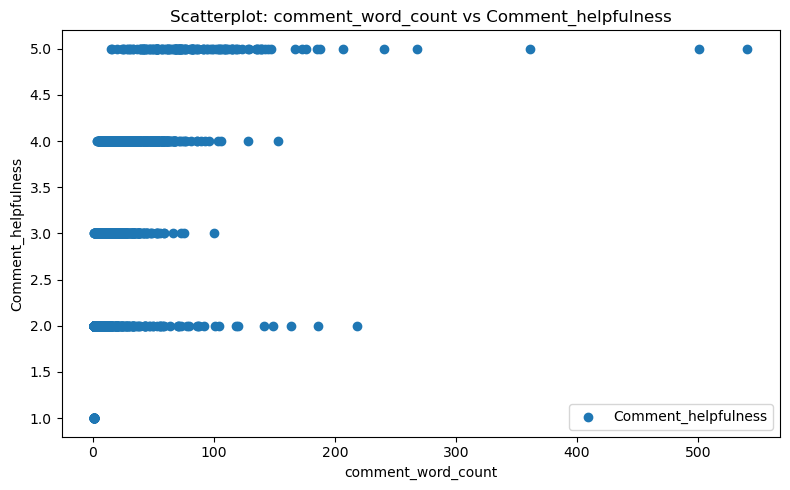

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Đảm bảo cột Comment_helpfulness là số (nếu không chuyển được sẽ thành NaN)
df['Comment_helpfulness'] = pd.to_numeric(df['Comment_helpfulness'], errors='coerce')

# Sắp xếp DataFrame theo Comment_helpfulness
df = df.sort_values(by='Comment_helpfulness', ascending=True)
# Làm tròn giá trị Comment_helpfulness về số nguyên gần nhất (không chia độ 0.5)
# Tạo scatterplot trực tiếp giữa comment_word_count và Comment_helpfulness
plt.figure(figsize=(8, 5))
plt.scatter(df['comment_word_count'], df['Comment_helpfulness'], alpha=1, label='Comment_helpfulness')
plt.xlabel('comment_word_count')
plt.ylabel('Comment_helpfulness')
plt.title('Scatterplot: comment_word_count vs Comment_helpfulness')
plt.tight_layout()

# Tính hệ số tương quan giữa comment_word_count và Comment_helpfulness
correlation = df['comment_word_count'].corr(df['Comment_helpfulness'])
print(f"Hệ số tương quan giữa comment_word_count và Comment_helpfulness: {correlation:.3f}")

plt.legend()
plt.show()